In [1]:
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import matplotlib.pyplot as plt
import csv
import os
import time
import datetime
import scipy as stats
import arrow
from citipy import citipy
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import time
import matplotlib.ticker as ticker

In [2]:
# Lists for holding Us Geological Survey (USGS) json data
mag_data = []
place_data = []
time_data = []
updated_data = []
tz_data = []
url_data = []
detail_data = []
felt_data = []
cdi_data = []
mmi_data = []
alert_data = []
status_data = []
tsunami_data = []
sig_data = []
net_data = []
code_data = []
ids_data = []
sources_data = []
types_data = []
nst_data = []
dmin_data = []
rms_data = []
gap_data = []
magType_data = []
type_data = []
title_data = []
geo_type_data = []
lng_data = []
lat_data = []
coordinates_3_data = []
city_data = []

#calculated lists
converted_date = []
cd_by_month = []
cd_by_year = []
cd_for_plot = []
month_label = []

epoch_by_month = []


In [3]:
# Start USGS API loop

years = 5
start = 1900
end = 2020
start_loop = start

json_returns = (((end +5)-start)/years)+1



for x in range(int(json_returns)):

    url_bit_1 = "https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime="
    year_from_1 = str(start_loop)
    year_from_2= "-01-01"
    year_to = str(int(year_from_1) + years)
    url_bit_2= "-01-01%0000:00:00&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time"

    # Build partial query URL
    Search = url_bit_1 + year_from_1 + year_from_2  + "%0000:00:01&endtime=" + year_to + url_bit_2
    #Search

    # set response variable
    response = req.get(Search).json()

    # idetify how many seismic events are in our json
    usgs_json_data = json.dumps(response)

    item_dict = json.loads(usgs_json_data)

    json_loops = len(item_dict['features'])

    #append usgs_json_data into list form

    json_counter = 0

    for x in range(json_loops):

        mag_data.append(response["features"][json_counter]["properties"]["mag"])
        place_data.append(response["features"][json_counter]["properties"]["place"])
        time_data.append(response["features"][json_counter]["properties"]["time"])
        updated_data.append(response["features"][json_counter]["properties"]["updated"])
        tz_data.append(response["features"][json_counter]["properties"]["tz"])
        url_data.append(response["features"][json_counter]["properties"]["url"])
        detail_data.append(response["features"][json_counter]["properties"]["detail"])
        felt_data.append(response["features"][json_counter]["properties"]["felt"])
        cdi_data.append(response["features"][json_counter]["properties"]["cdi"])
        mmi_data.append(response["features"][json_counter]["properties"]["mmi"])
        alert_data.append(response["features"][json_counter]["properties"]["alert"])
        status_data.append(response["features"][json_counter]["properties"]["status"])
        tsunami_data.append(response["features"][json_counter]["properties"]["tsunami"])
        sig_data.append(response["features"][json_counter]["properties"]["sig"])
        net_data.append(response["features"][json_counter]["properties"]["net"])
        code_data.append(response["features"][json_counter]["properties"]["code"])
        ids_data.append(response["features"][json_counter]["properties"]["ids"])
        sources_data.append(response["features"][json_counter]["properties"]["sources"])
        types_data.append(response["features"][json_counter]["properties"]["types"])
        nst_data.append(response["features"][json_counter]["properties"]["nst"])
        dmin_data.append(response["features"][json_counter]["properties"]["dmin"])
        rms_data.append(response["features"][json_counter]["properties"]["rms"])
        gap_data.append(response["features"][json_counter]["properties"]["gap"])
        magType_data.append(response["features"][json_counter]["properties"]["magType"])
        type_data.append(response["features"][json_counter]["properties"]["type"])
        title_data.append(response["features"][json_counter]["properties"]["title"])
        geo_type_data.append(response["features"][json_counter]["geometry"]["type"])
        lng_data.append(response["features"][json_counter]["geometry"]["coordinates"][0])
        lat_data.append(response["features"][json_counter]["geometry"]["coordinates"][1])
        coordinates_3_data.append(response["features"][json_counter]["geometry"]["coordinates"][2])
        city_data.append(citipy.nearest_city(lat_data[len(lat_data)-1], lng_data[len(lng_data)-1]).city_name)
        
        
        # calculated fields
        
        converted_date.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(converted_date)-1])).strftime('%m-%d-%Y'))
        cd_by_month.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m-%Y'))
        cd_by_year.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_year)-1])).strftime('%Y'))
        cd_for_plot.append(datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1]))
        month_label.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m'))
        
        epoch_by_month.append(arrow.get(cd_by_month[len(cd_by_month)-1], 'MM-YYYY').format('X'))
        
               
        json_counter = json_counter + 1    
        
    start_loop = year_to     

In [4]:
seismic_data = {"mag" : mag_data,
                "place" : place_data,
                "time" : time_data,
                "updated" : updated_data,
                "tz" : tz_data,
                "url" : url_data,
                "detail" : detail_data,
                "felt" : felt_data,
                "cdi" : cdi_data,
                "mmi" : mmi_data,
                "alert" : alert_data,
                "status" : status_data,
                "tsunami" : tsunami_data,
                "sig" : sig_data,
                "net" : net_data,
                "code" : code_data,
                "ids" : ids_data,
                "sources" : sources_data,
                "types" : types_data,
                "nst" : nst_data,
                "dmin" : dmin_data,
                "rms" : rms_data,
                "gap" : gap_data,
                "magType" : magType_data,
                "type" : type_data,
                "title" : title_data,
                "geo_type" : geo_type_data,
                "lng" : lng_data,
                "lat" : lat_data,
                "coordinates_3" : coordinates_3_data,
                "city" : city_data,
                
                "converted_date" : converted_date,
                "cd_by_month" : cd_by_month,
                "cd_by_year" : cd_by_year,
                "cd_for_plot" : cd_for_plot,
                "month_label" : month_label,
                    
                "epoch_by_month" : epoch_by_month,
                
               }

seismic_data = pd.DataFrame(seismic_data)

#first and last event
year_range = seismic_data.iloc[0,2] + " through " + seismic_data.iloc[len(seismic_data)-1,2]

seismic_data.to_csv("seismic_data.csv")

In [ ]:
# Magnitude by Year

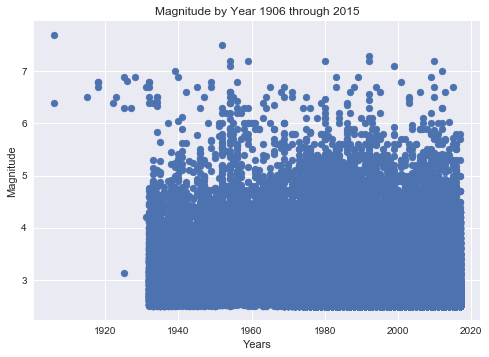

In [6]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year" + " " + year_range)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
plt.savefig("Magnitude by Year.png")

# Show plot
plt.show()

In [15]:
seismic_mean_mag = seismic_data.groupby(["cd_by_year"]).mean()["mag"]
seismic_mag_count = seismic_data.groupby(["cd_by_year"]).count()["mag"]
cd_by_year= seismic_data["cd_by_year"]

seismic_data7_df = pd.DataFrame({"seismic_mean_mag" : seismic_mean_mag,
                                "seismic_mag_count" : seismic_mag_count,
                                })

seismic_data7_df = seismic_data7_df.reset_index()

# Average Magnitude and Count YTY

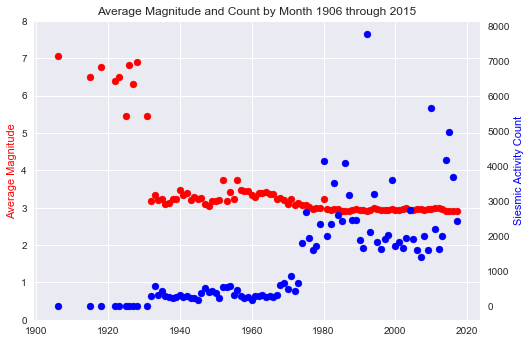

In [17]:
x = seismic_data7_df["cd_by_year"]
y1 = seismic_data7_df["seismic_mean_mag"]
y2 = seismic_data7_df["seismic_mag_count"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='b')


ax1.set_ylim(0, 8)

# Incorporate the other graph properties
plt.title("Average Magnitude and Count by Month" + " " + year_range)
ax1.set_ylabel("Average Magnitude", color = "r")
ax2.set_ylabel("Siesmic Activity Count", color = "b")
plt.xlabel("Years")
plt.grid(False)

# Save the figure
plt.savefig("Average Magnitude and Count by Year.png")


plt.show()

# Magnitude by Year

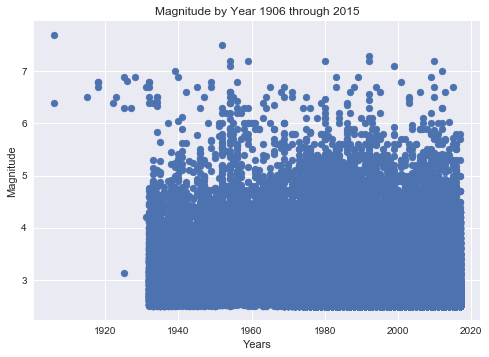

In [35]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year" + " " + year_range)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
plt.savefig("Magnitude by Year.png")

# Show plot
plt.show()

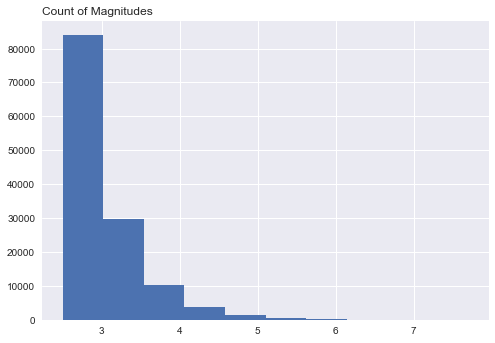

count    130017.000000
mean          2.999354
std           0.501850
min           2.500000
25%           2.630000
50%           2.850000
75%           3.200000
max           7.700000
Name: mag, dtype: float64

In [37]:
plt.hist(seismic_data["mag"], 
         bins=None, 
         range=None, 
         normed=False, 
         weights=None, 
         cumulative=False, 
         bottom=None, 
         histtype='bar', 
         align='mid', 
         orientation='vertical', 
         rwidth=None, 
         log=False, 
         color=None, 
         label="seismic_avg_month", 
         stacked=False, 
         hold=None, 
         data=None, 
         )

plt.title("Count of Magnitudes", loc = "left")

plt.show()
seismic_data["mag"].describe()